1.	CRIM       per capita crime rate by town
2.	ZN         proportion of residential land zoned for lots over 25,000 sq.ft.
3.	INDUS      proportion of non-retail business acres per town.
4.	CHAS       Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5.	NOX        nitric oxides concentration (parts per 10 million)
6.	RM         average number of rooms per dwelling
7.	AGE        proportion of owner-occupied units built prior to 1940
8.	DIS        weighted distances to five Boston employment centres
9.	RAD        index of accessibility to radial highways
10.	TAX        full-value property-tax rate per dollars 10,000
11.	PTRATIO    pupil-teacher ratio by town
12.	B          1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13.	LSTAT      % lower status of the population
14.	MEDV       Median value of owner-occupied homes in $1000's


In [36]:
import warnings

# Ignora todos los FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
# Funciones para análisis de la regresión.
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def plot_scatter_variables(df, target, variables=None):
    if variables is None:
        variables = [col for col in df.columns if col != target]

    num_vars = len(variables)
    cols = 3  # Número de columnas en la cuadrícula de subplots
    rows = (num_vars // cols) + (num_vars % cols > 0)  # Ajustar número de filas
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()  # Convertimos en un array 1D para indexar fácilmente

    for i, var in enumerate(variables):
        sns.scatterplot(x=df[var], y=df[target], ax=axes[i], alpha=0.6)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(target)
        axes[i].set_title(f'{var} vs {target}')
    
    # Ocultar ejes vacíos si sobran
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    
def plot_correlation_heatmap(df, method = None):
    if method is None:
        # Calculamos la matriz de correlación entre las variables numéricas
        corr_matrix = df.corr()
    else:
        corr_matrix = df.corr(method = method)
    # Dibujamos el heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, cbar=True)
    plt.title('Correlación entre las Variables')
    plt.show()
    
def print_regression_report(y_true, y_pred):
    #evaluate our model's performance using mean squared error
    mse=mean_squared_error(y_true, y_pred)
    
    #evaluate our model's performance using mean absolute error
    mae=mean_absolute_error(y_true, y_pred)
    
    #evaluate our model's performance using r2_score
    R2_score=r2_score(y_true, y_pred)
    
    print("Mean Squared Error :",mse)
    print("mean Absolute Error :",mae)
    print("R2 Score :",R2_score)


In [27]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Usar el delimitador adecuado con 'sep'
housing_df = pd.read_csv('housing.csv', names=column_names, sep='\s+')

In [4]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


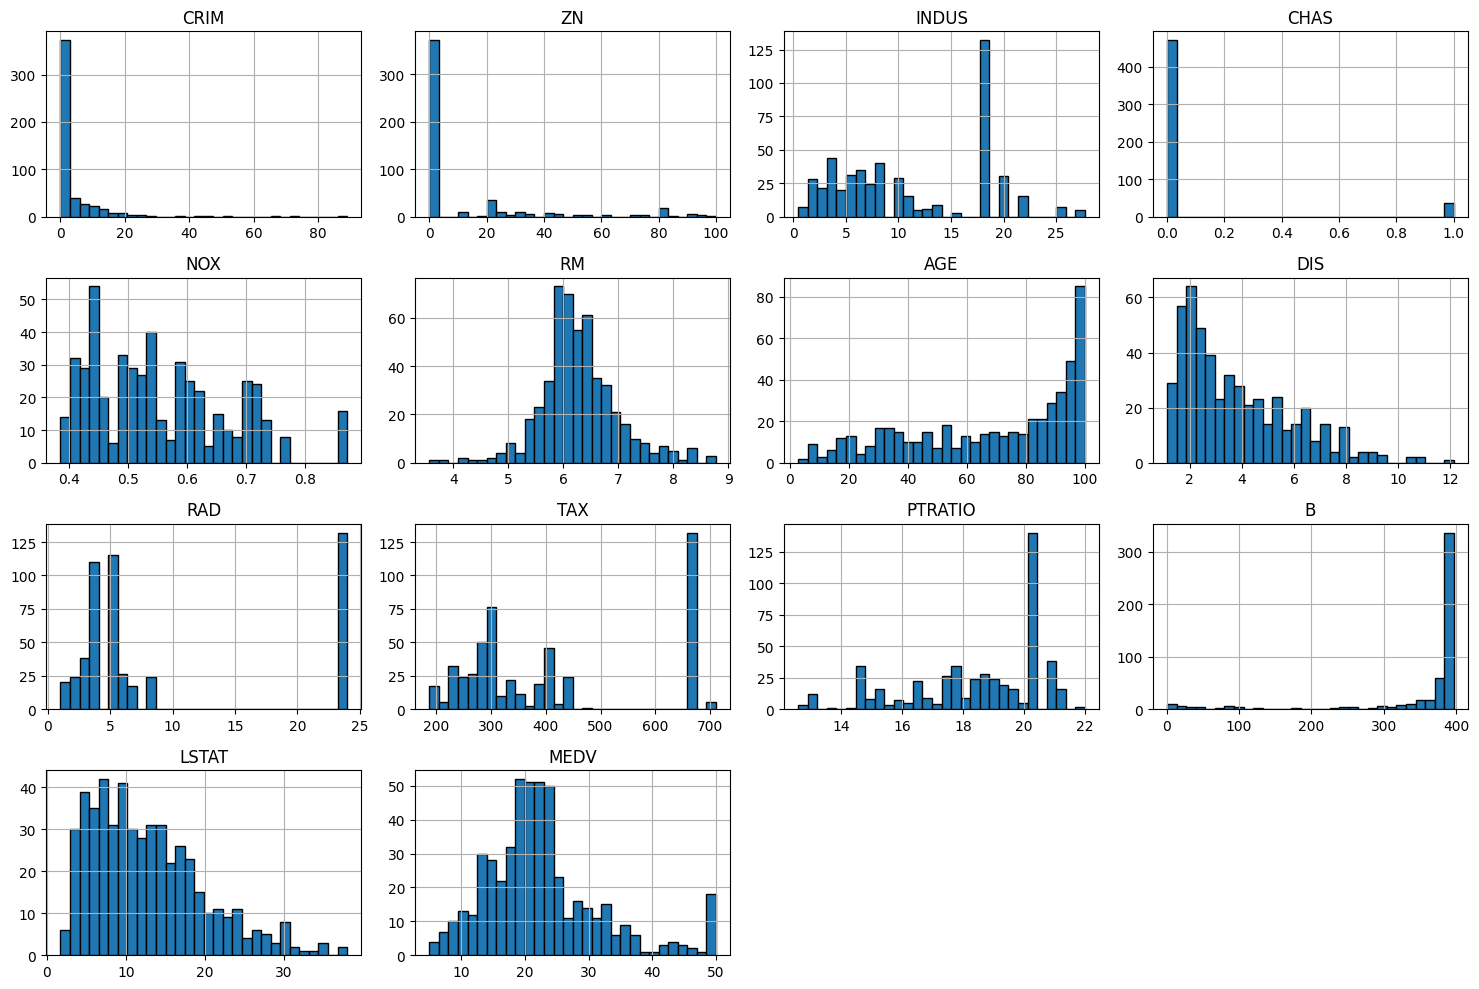

In [7]:
# Configuración del tamaño de las gráficas
housing_df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

1. CRIM (Tasa de criminalidad per cápita)
- Distribución: Altamente sesgada a la derecha.
- Interpretación: La mayoría de las zonas tienen tasas de criminalidad muy bajas, pero hay algunas con tasas significativamente más altas (outliers).
- Acción: Considera aplicar una transformación logarítmica para reducir el sesgo.

2. ZN (Proporción de terrenos residenciales para lotes grandes)
- Distribución: Sesgo a la derecha con muchos valores en 0.
- Interpretación: Muchas zonas no tienen terrenos residenciales grandes, y unas pocas tienen proporciones altas.
- Acción: Este tipo de variable puede comportarse como categórica o binaria en algunos modelos.

3. INDUS (Proporción de terrenos no comerciales)
- Distribución: Bimodal, con picos alrededor de 6 y 18.
- Interpretación: Algunas áreas tienen baja industrialización mientras que otras son altamente industriales.
- Acción: Revisa la correlación con MEDV, ya que zonas más industriales podrían tener valores de viviendas más bajos.

4. CHAS (Variable dummy del Río Charles)
- Distribución: Altamente desequilibrada, la mayoría es 0 (no colinda con el río).
- Interpretación: Muy pocas propiedades están cerca del río.
- Acción: Puede tener un impacto significativo en el precio de las viviendas debido a su naturaleza binaria.

5. NOX (Concentración de óxidos nítricos)
- Distribución: Sesgada hacia la izquierda, pero relativamente dispersa.
- Interpretación: La mayoría de las áreas tienen concentraciones bajas, aunque hay valores altos que podrían afectar negativamente el valor de las viviendas.
- Acción: Considera la relación con INDUS y CRIM.

6. RM (Número promedio de habitaciones por vivienda)
- Distribución: Aproximadamente normal.
- Interpretación: La mayoría de las viviendas tienen entre 5 y 7 habitaciones. Esto es una buena señal para la regresión lineal.
- Acción: Altamente correlacionada con MEDV, generalmente más habitaciones = mayor precio.

7. AGE (Proporción de viviendas construidas antes de 1940)
- Distribución: Sesgada a la izquierda.
- Interpretación: Muchas viviendas son antiguas (más del 80%).
- Acción: Podría relacionarse negativamente con MEDV, dependiendo del estado de las viviendas.

8. DIS (Distancia a los centros de empleo)
- Distribución: Sesgada a la derecha.
- Interpretación: La mayoría de las viviendas están cerca de los centros de empleo, pero algunas están mucho más alejadas.
- Acción: Puede tener una relación inversa con MEDV, donde viviendas más cercanas a centros urbanos son más costosas.

9. RAD (Accesibilidad a autopistas radiales)
- Distribución: Discreta y altamente sesgada.
- Interpretación: Algunos valores específicos son muy comunes, lo que indica que ciertos niveles de accesibilidad son más frecuentes.
- Acción: Variable categórica en esencia, podría transformarse para modelos.

10. TAX (Tasa de impuesto a la propiedad)
- Distribución: Multimodal, con un pico significativo alrededor de 660.
- Interpretación: Las tasas de impuestos varían bastante entre las zonas.
- Acción: Revisar la correlación con RAD y INDUS.

11. PTRATIO (Proporción alumno-profesor por zona)
- Distribución: Discreta con acumulación en ciertos valores.
- Interpretación: Muchas zonas comparten las mismas proporciones de alumnos por maestro.
- Acción: Podría tener una relación inversa con MEDV, donde menores ratios indican mejores escuelas y valores de vivienda más altos.

12. B (Proporción de personas de raza negra por zona, transformada)
- Distribución: Altamente sesgada hacia la derecha.
- Interpretación: La mayoría de los valores están cerca del máximo (400), lo que podría indicar poca variación en esta variable.
- Acción: Podría tener una relación complicada con MEDV, revisar correlación.

13. LSTAT (% de población de bajo estatus socioeconómico)
- Distribución: Sesgada a la derecha.
- Interpretación: La mayoría de las zonas tienen un porcentaje bajo de población de estatus socioeconómico bajo, pero algunas zonas presentan valores significativamente más altos.
- Acción: Probablemente tenga una fuerte correlación negativa con MEDV.

14. MEDV (Valor mediano de las viviendas)
- Distribución: Aproximadamente normal, pero con un pico en 50 (posible tope en el dataset).
- Interpretación: El tope sugiere que podría haber un límite en los datos recogidos, lo cual puede afectar la precisión del modelo para valores altos.
- Acción: Considerar que los valores en 50 podrían estar censurados, lo cual puede distorsionar el modelo.


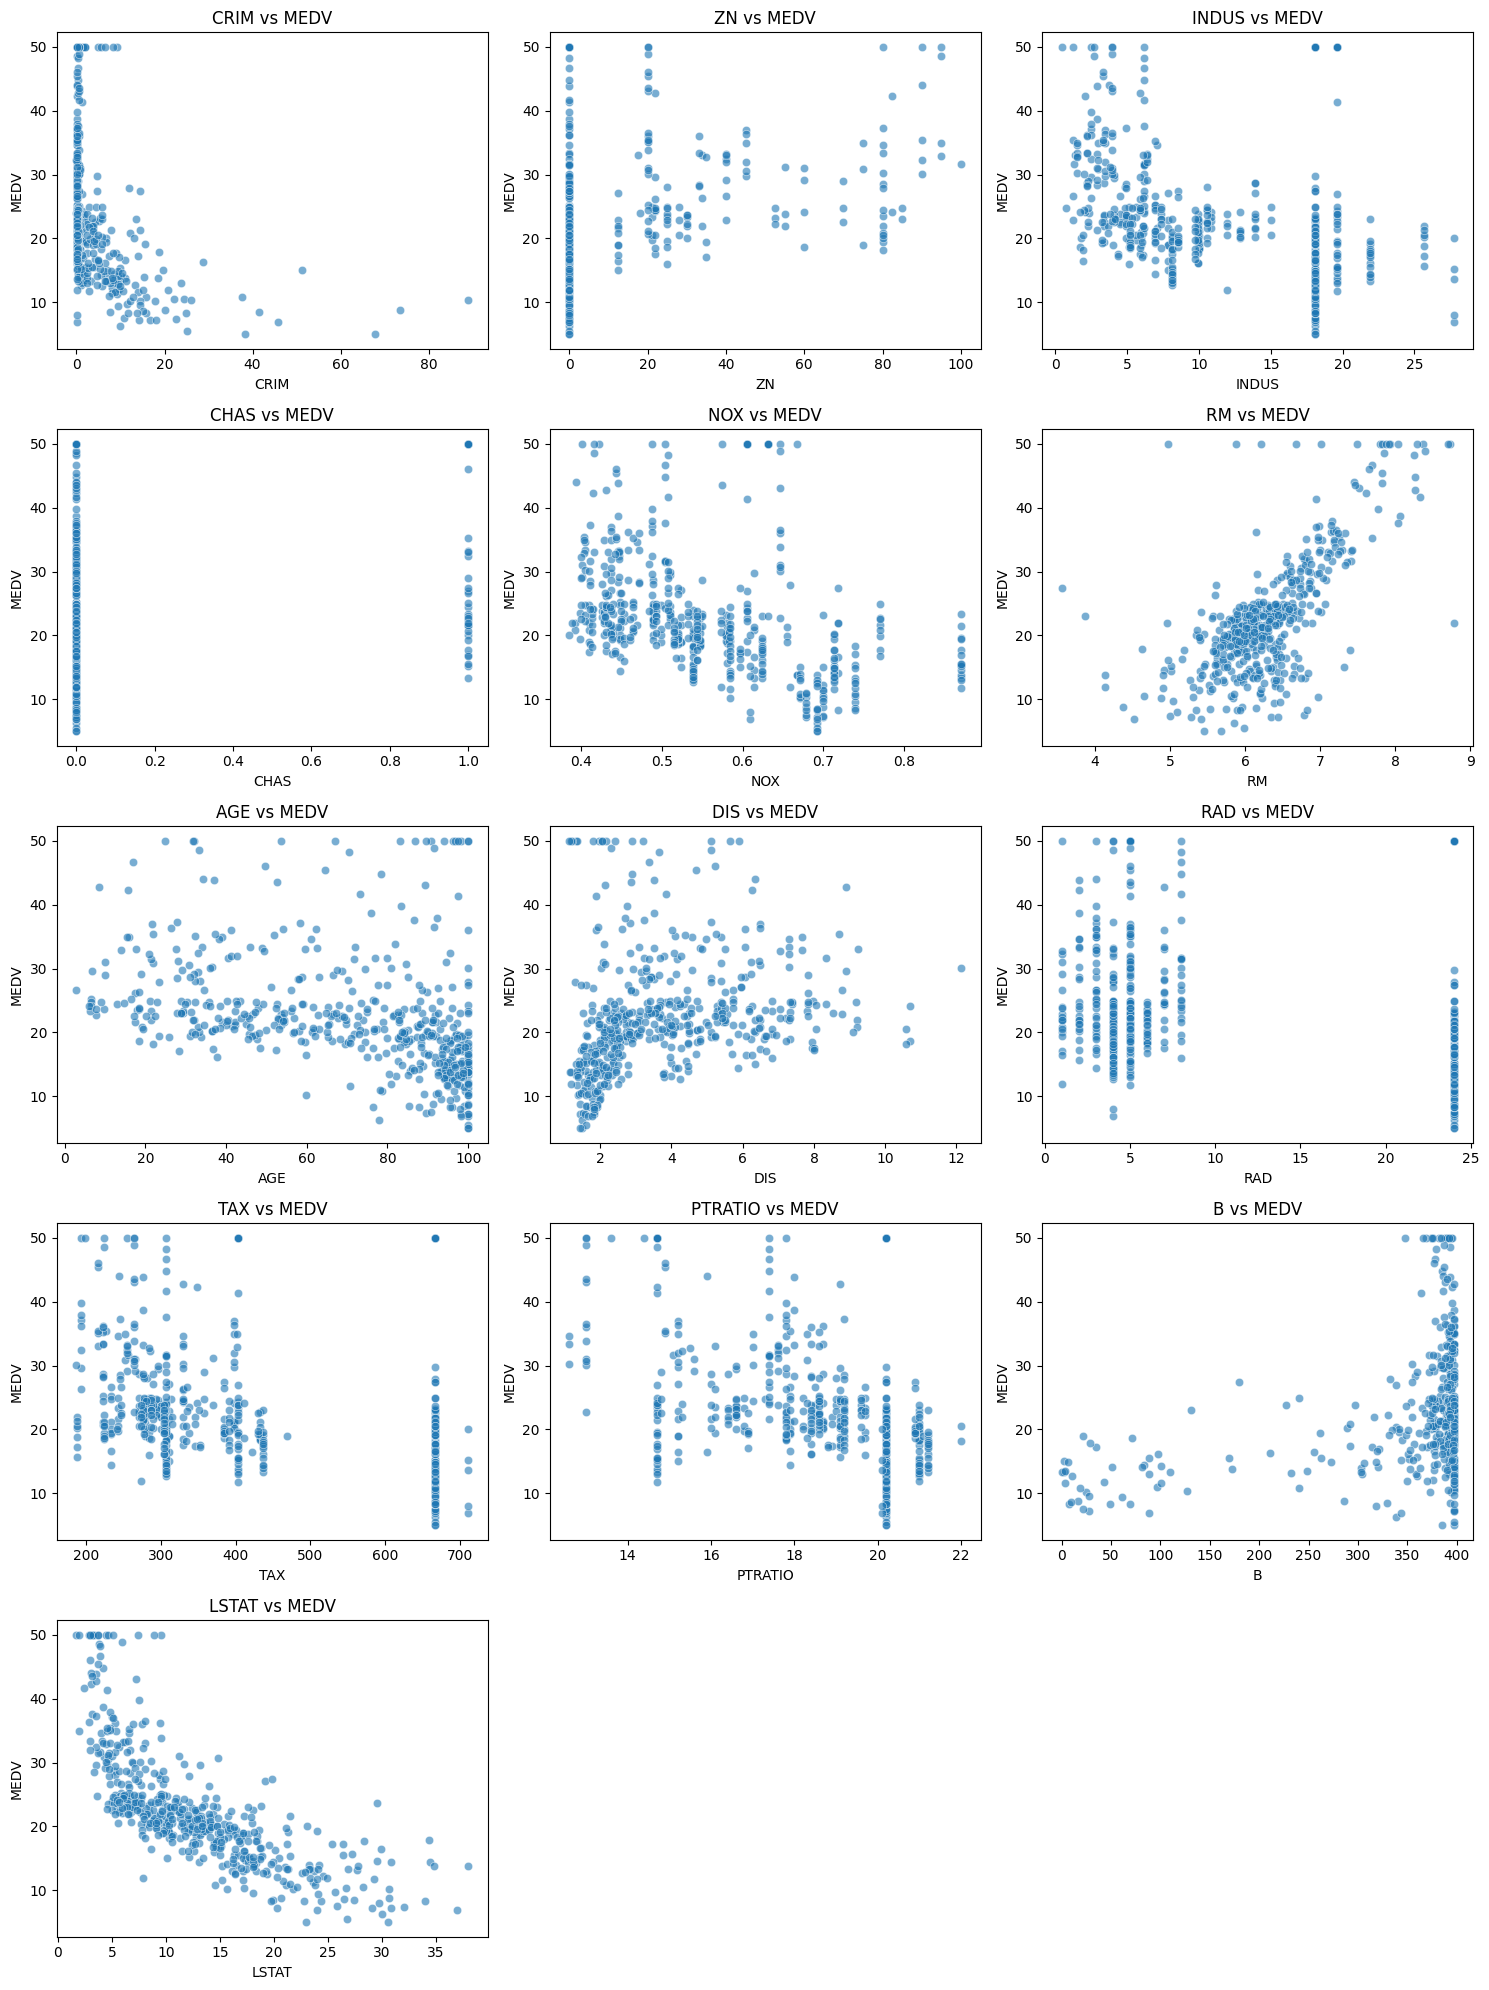

In [8]:
plot_scatter_variables(housing_df, target='MEDV')


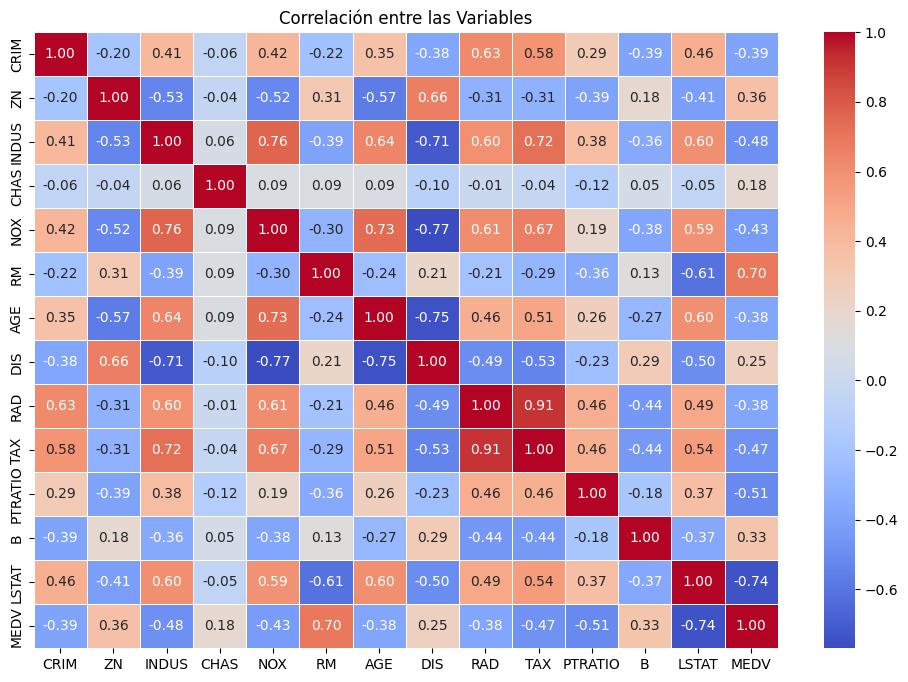

In [9]:
plot_correlation_heatmap(housing_df)


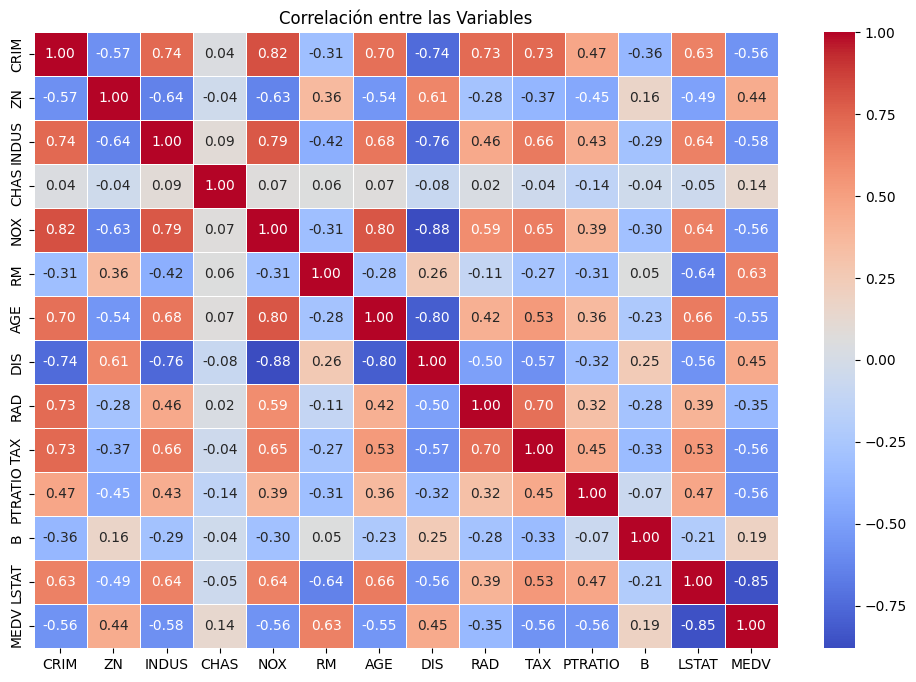

In [10]:
plot_correlation_heatmap(housing_df, method='spearman')


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definir features y target
X = housing_df.drop('MEDV', axis=1)
y = housing_df['MEDV']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir valores
y_pred = model.predict(X_test)

# Evaluar el modelo usando la función personalizada
print_regression_report(y_test, y_pred)


Mean Squared Error : 24.2911194749737
mean Absolute Error : 3.189091965887872
R2 Score : 0.6687594935356296


- El MSE mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales. Como los errores están al cuadrado, penaliza más fuertemente los errores grandes.
    - Dado que la variable objetivo (MEDV) representa el precio de las casas en miles de dólares, un MSE de 24.29 significa que el error cuadrático medio es de aproximadamente $24,290.
- El MAE es el promedio de los errores absolutos entre las predicciones y los valores reales. Es más intuitivo que el MSE porque no penaliza los errores grandes tan severamente.
    - Un MAE de 3.19 significa que, en promedio, tus predicciones están desviadas en $3,190 del valor real de las viviendas.


- La diferencia entre el MAE y el MSE sugiere que hay algunos errores grandes en las predicciones que están influyendo más en el MSE.


- El R² (Coeficiente de Determinación) mide qué tan bien el modelo explica la variabilidad de la variable objetivo.
    - Un R² de 0.669 indica que tu modelo está explicando alrededor del 66.9% de la variabilidad en los precios de las viviendas.


In [12]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split

# Definir las features y el target
X = housing_df.drop('MEDV', axis=1)
y = housing_df['MEDV']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agregar la constante para el término independiente (intercepto)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Crear y entrenar el modelo OLS
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Mostrar el resumen estadístico del modelo
print(ols_model.summary())

# Predecir valores en el conjunto de prueba
y_pred = ols_model.predict(X_test_sm)

# Usar la función para evaluar el modelo
print_regression_report(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          6.21e-109
Time:                        17:48:22   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2468      5.677      5.328      0.0

## StandarScaler

In [13]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Definir las features y el target
X = housing_df.drop('MEDV', axis=1)
y = housing_df['MEDV']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar StandardScaler a los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame asegurando mantener los mismos índices que los originales
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Agregar la constante para el término independiente (intercepto)
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

# Crear y entrenar el modelo OLS
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Mostrar el resumen estadístico del modelo
print(ols_model.summary())

# Predecir valores en el conjunto de prueba
y_pred = ols_model.predict(X_test_sm)

# Evaluar el modelo
print_regression_report(y_test, y_pred)


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          6.21e-109
Time:                        17:48:22   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.7965      0.236     96.774      0.0

## Regularizacion L1 - Lasso

In [14]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Definir las features y el target
X = housing_df.drop('MEDV', axis=1)
y = housing_df['MEDV']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar StandardScaler a los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame asegurando mantener los mismos índices que los originales
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Agregar la constante para el término independiente (intercepto)
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

# Ajustar el modelo OLS con sqrt_lasso
sqrt_lasso_model = sm.OLS(y_train,
                          X_train_sm).fit_regularized(
                                                    # method='sqrt_lasso', 
                                                    alpha=0.2,  # Penalización para la función de costo
                                                    L1_wt=1.0   # Lasso
                                                    )

# Mostrar los coeficientes del modelo sqrt_lasso
print("\nCoeficientes sqrt_lasso:\n", sqrt_lasso_model.params)

# Predecir valores en el conjunto de prueba
y_pred_sqrt_lasso = sqrt_lasso_model.predict(X_test_sm)

# Evaluar el modelo sqrt_lasso
print("\nEvaluación del Modelo sqrt_lasso:")
print_regression_report(y_test, y_pred_sqrt_lasso)


Coeficientes sqrt_lasso:
 const      22.596535
CRIM       -0.493165
ZN          0.000000
INDUS       0.000000
CHAS        0.637582
NOX        -1.053183
RM          3.362257
AGE         0.000000
DIS        -1.618118
RAD         0.000000
TAX         0.000000
PTRATIO    -1.739648
B           0.944455
LSTAT      -3.581859
dtype: float64

Evaluación del Modelo sqrt_lasso:
Mean Squared Error : 27.070160533169933
mean Absolute Error : 3.238576238974234
R2 Score : 0.6308637115585745


## Regularización L2 - Ridge

In [15]:
# Ajustar el modelo OLS con sqrt_lasso
l2_model = sm.OLS(y_train,
                          X_train_sm).fit_regularized(
                                                    # method='sqrt_lasso', 
                                                    alpha=0.42,  #Penalización para la función de costo
                                                    L1_wt=0   #  Ridge regression
                                                    )

# Mostrar los coeficientes del modelo sqrt_lasso
print("\nCoeficientes:\n", l2_model.params)

# Predecir valores en el conjunto de prueba
y_pred_l2 = l2_model.predict(X_test_sm)

# Evaluar el modelo sqrt_lasso
print("\nEvaluación:")
print_regression_report(y_test, y_pred_l2)


Coeficientes:
 [16.05389764 -0.63440939  0.22072111 -0.40239422  0.76381099 -0.66062469
  2.77258867 -0.17920447 -1.09119508  0.17070342 -0.46311879 -1.43409006
  0.84129241 -2.53288308]

Evaluación:
Mean Squared Error : 72.91276113194125
mean Absolute Error : 6.903058501079052
R2 Score : 0.00574117426154408


In [16]:
# Definir las features y el target
X = housing_df.drop('MEDV', axis=1)
y = housing_df['MEDV']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar StandardScaler a los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame asegurando mantener los mismos índices que los originales
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Agregar la constante para el término independiente (intercepto)
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

# Ajustar el modelo OLS con Lasso (L1 regularization)
lasso_model = sm.OLS(y_train, X_train_sm).fit_regularized(
    # method='sqrt_lasso', 
    alpha=0.001,  # Penalización para la función de costo
    L1_wt=1.0   # Lasso puro
)

# Ajustar el modelo OLS con Ridge (L2 regularization)
ridge_model = sm.OLS(y_train, X_train_sm).fit_regularized(
    # method='sqrt_lasso', 
    alpha=1,  # Misma penalización para comparar con Lasso
    L1_wt=0.0   # Ridge puro
)

# Mostrar los coeficientes etiquetados para Lasso y Ridge
lasso_coefficients = pd.Series(lasso_model.params, index=X_train_sm.columns)
ridge_coefficients = pd.Series(ridge_model.params, index=X_train_sm.columns)

print("\nCoeficientes Lasso:\n", lasso_coefficients)
print("\nCoeficientes Ridge:\n", ridge_coefficients)

# Predecir valores en el conjunto de prueba
y_pred_lasso = lasso_model.predict(X_test_sm)
y_pred_ridge = ridge_model.predict(X_test_sm)

# Función para evaluar el modelo
def print_regression_report_reg(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nEvaluación del Modelo {model_name}:")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Error : {mae}")
    print(f"R2 Score : {r2}")

# Evaluar ambos modelos
print_regression_report_reg(y_test, y_pred_lasso, "Lasso (L1)")
print_regression_report_reg(y_test, y_pred_ridge, "Ridge (L2)")



Coeficientes Lasso:
 const      22.795535
CRIM       -0.999166
ZN          0.691225
INDUS       0.268737
CHAS        0.718899
NOX        -2.015658
RM          3.145933
AGE        -0.173744
DIS        -3.074759
RAD         2.232375
TAX        -1.748310
PTRATIO    -2.035750
B           1.128353
LSTAT      -3.611475
dtype: float64

Coeficientes Ridge:
 const      11.398267
CRIM       -0.545110
ZN          0.230260
INDUS      -0.469851
CHAS        0.651404
NOX        -0.472191
RM          2.161476
AGE        -0.207252
DIS        -0.525565
RAD        -0.117948
TAX        -0.462027
PTRATIO    -1.139410
B           0.654438
LSTAT      -1.909591
dtype: float64

Evaluación del Modelo Lasso (L1):
Mean Squared Error : 24.29555009736806
Mean Absolute Error : 3.18799953922518
R2 Score : 0.668699076328124

Evaluación del Modelo Ridge (L2):
Mean Squared Error : 155.45802506708708
Mean Absolute Error : 11.274137425224211
R2 Score : -1.1198691567189898


## Feature Selection

### Forward Feature Selection

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Definir las features y el target SIN ESCALAR
X = housing_df.drop('MEDV', axis=1)
y = housing_df['MEDV']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
linear_model = LinearRegression()

# Aplicar Forward Feature Selection usando R² como métrica
sfs = SequentialFeatureSelector(
    linear_model,
    n_features_to_select='auto',      # Selecciona automáticamente el número óptimo de características
    direction='forward',              # Selección hacia adelante
    scoring='r2',                     # Usar R² como métrica
    tol=1e-5,                         # Tolerancia para detener la selección
    cv=5,                             # Validación cruzada para mejor evaluación
    n_jobs=-1                         # Usar todos los núcleos disponibles
)

# Ajustar el selector al conjunto de entrenamiento
sfs.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X_train.columns[sfs.get_support()]

print("\nCaracterísticas Seleccionadas por Forward Feature Selection:")
print(selected_features)

# Entrenar un modelo usando solo las características seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

linear_model.fit(X_train_selected, y_train)

# Predicciones en ambos conjuntos
y_pred_train = linear_model.predict(X_train_selected)
y_pred_test = linear_model.predict(X_test_selected)

# Evaluar el modelo en el conjunto de entrenamiento
print_regression_report_reg(y_train, y_pred_train, "Entrenamiento")

# Evaluar el modelo en el conjunto de prueba
print_regression_report_reg(y_test, y_pred_test, "Prueba")



Características Seleccionadas por Forward Feature Selection:
Index(['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

Evaluación del Modelo Entrenamiento:
Mean Squared Error : 21.865461338787117
Mean Absolute Error : 3.341881886656635
R2 Score : 0.748306611988744

Evaluación del Modelo Prueba:
Mean Squared Error : 25.500212598176194
Mean Absolute Error : 3.265642056805143
R2 Score : 0.6522719611720098


### Backward Feature Selection

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Definir las features y el target SIN ESCALAR
X = housing_df.drop('MEDV', axis=1)
y = housing_df['MEDV']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
linear_model = LinearRegression()

# Aplicar Forward Feature Selection usando R² como métrica
sfs = SequentialFeatureSelector(
    linear_model,
    n_features_to_select='auto',      # Selecciona automáticamente el número óptimo de características
    direction='backward',              # Selección hacia atrás
    scoring='r2',                     # Usar R² como métrica
    tol=1e-5,                         # Tolerancia para detener la selección
    cv=5,                             # Validación cruzada para mejor evaluación
    n_jobs=-1                         # Usar todos los núcleos disponibles
)

# Ajustar el selector al conjunto de entrenamiento
sfs.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X_train.columns[sfs.get_support()]

print("\nCaracterísticas Seleccionadas por Backward Feature Selection:")
print(selected_features)

# Entrenar un modelo usando solo las características seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

linear_model.fit(X_train_selected, y_train)

# Predicciones en ambos conjuntos
y_pred_train = linear_model.predict(X_train_selected)
y_pred_test = linear_model.predict(X_test_selected)

# Evaluar el modelo en el conjunto de entrenamiento
print_regression_report_reg(y_train, y_pred_train, "Entrenamiento")

# Evaluar el modelo en el conjunto de prueba
print_regression_report_reg(y_test, y_pred_test, "Prueba")



Características Seleccionadas por Backward Feature Selection:
Index(['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

Evaluación del Modelo Entrenamiento:
Mean Squared Error : 21.865461338787117
Mean Absolute Error : 3.341881886656635
R2 Score : 0.748306611988744

Evaluación del Modelo Prueba:
Mean Squared Error : 25.500212598176194
Mean Absolute Error : 3.265642056805143
R2 Score : 0.6522719611720098


### Regularization Path (Path Plot)?

#### L1

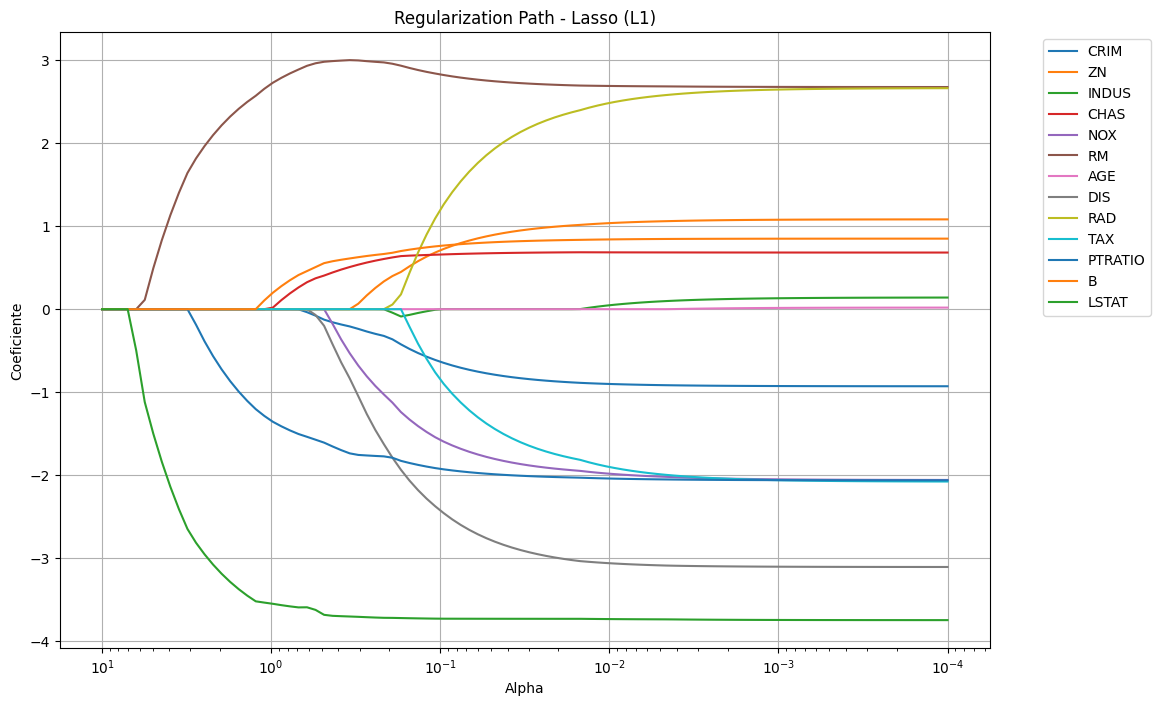

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = housing_df['MEDV'].values

# Calcular el Lasso path (trayectoria de regularización)
alphas_lasso, coefs_lasso, _ = lasso_path(X_scaled, y, alphas=np.logspace(-4, 1, 100))

# Graficar
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.plot(alphas_lasso, coefs_lasso[i], label=feature)

plt.xscale('log')
plt.gca().invert_xaxis()  # Invertir el eje X para que alpha vaya de pequeño a grande
plt.xlabel('Alpha')
plt.ylabel('Coeficiente')
plt.title('Regularization Path - Lasso (L1)')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), ncol=1)
plt.grid(True)
plt.show()


#### L2

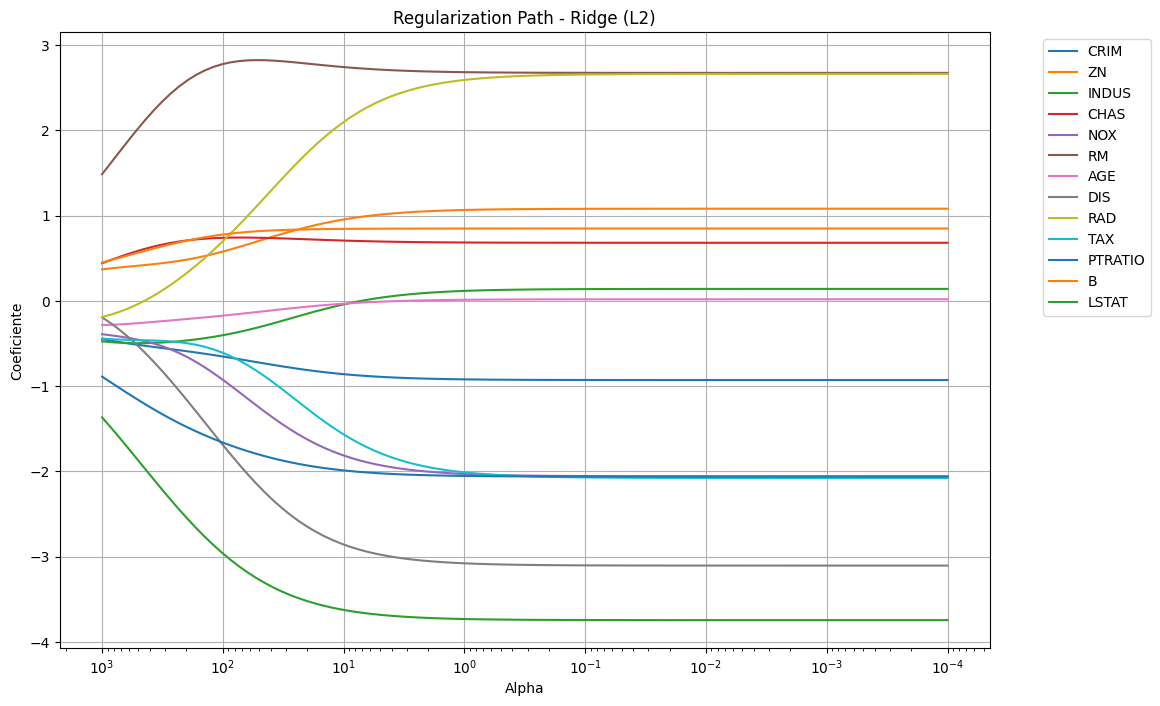

In [20]:
from sklearn.linear_model import Ridge
alphas_ridge = np.logspace(-4, 3, 100)
coefs_ridge = []

for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y)
    coefs_ridge.append(ridge.coef_)

# Convertir a array para graficar
coefs_ridge = np.array(coefs_ridge)

# Graficar
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.plot(alphas_ridge, coefs_ridge[:, i], label=feature)

plt.xscale('log')
plt.gca().invert_xaxis()  # Invertir el eje X para que alpha vaya de pequeño a grande
plt.xlabel('Alpha')
plt.ylabel('Coeficiente')
plt.title('Regularization Path - Ridge (L2)')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), ncol=1)
plt.grid(True)
plt.show()


## Transformación de variables

In [45]:
def plot_comparison_original_transformed(df, target, pairs, bins):
    """
    Muestra para cada par (var_orig, var_trans):
       - Histograma var_orig (col izq, fila 1)
       - Histograma var_trans (col dcha, fila 1)
       - Scatter var_orig vs. target (col izq, fila 2)
       - Scatter var_trans vs. target (col dcha, fila 2)
    """
    for (var_orig, var_trans) in pairs:
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
        
        # --- Fila 1, Col 1: Histograma ORIGINAL ---
        sns.histplot(df[var_orig], kde=False, ax=axes[0, 0], bins=bins)
        axes[0, 0].set_title(f'Histograma de {var_orig} (Original)')
        axes[0, 0].set_xlabel(var_orig)
        axes[0, 0].set_ylabel('Frecuencia')
        
        # --- Fila 1, Col 2: Histograma TRANSFORMADA ---
        sns.histplot(df[var_trans], kde=False, ax=axes[0, 1], bins=bins)
        axes[0, 1].set_title(f'Histograma de {var_trans} (Transformada)')
        axes[0, 1].set_xlabel(var_trans)
        axes[0, 1].set_ylabel('Frecuencia')
        
        # --- Fila 2, Col 1: Scatter ORIGINAL vs. target ---
        sns.scatterplot(x=df[var_orig], y=df[target], ax=axes[1, 0], alpha=0.6)
        axes[1, 0].set_title(f'{var_orig} vs. {target} (Original)')
        axes[1, 0].set_xlabel(var_orig)
        axes[1, 0].set_ylabel(target)
        
        # --- Fila 2, Col 2: Scatter TRANSFORMADA vs. target ---
        sns.scatterplot(x=df[var_trans], y=df[target], ax=axes[1, 1], alpha=0.6)
        axes[1, 1].set_title(f'{var_trans} vs. {target} (Transformada)')
        axes[1, 1].set_xlabel(var_trans)
        axes[1, 1].set_ylabel(target)
        
        plt.tight_layout()
        plt.show()
        

In [28]:
# Añadimos 1 para evitar log(0) en caso de que haya valores muy pequeños
housing_df['LSTAT_log'] = np.log(housing_df['LSTAT'] + 1)
housing_df['DIS_log']   = np.log(housing_df['DIS']   + 1)
housing_df['NOX_log']   = np.log(housing_df['NOX']   + 1)


In [56]:
housing_df['INDUS_log'] = np.log(housing_df['INDUS'] + 1)

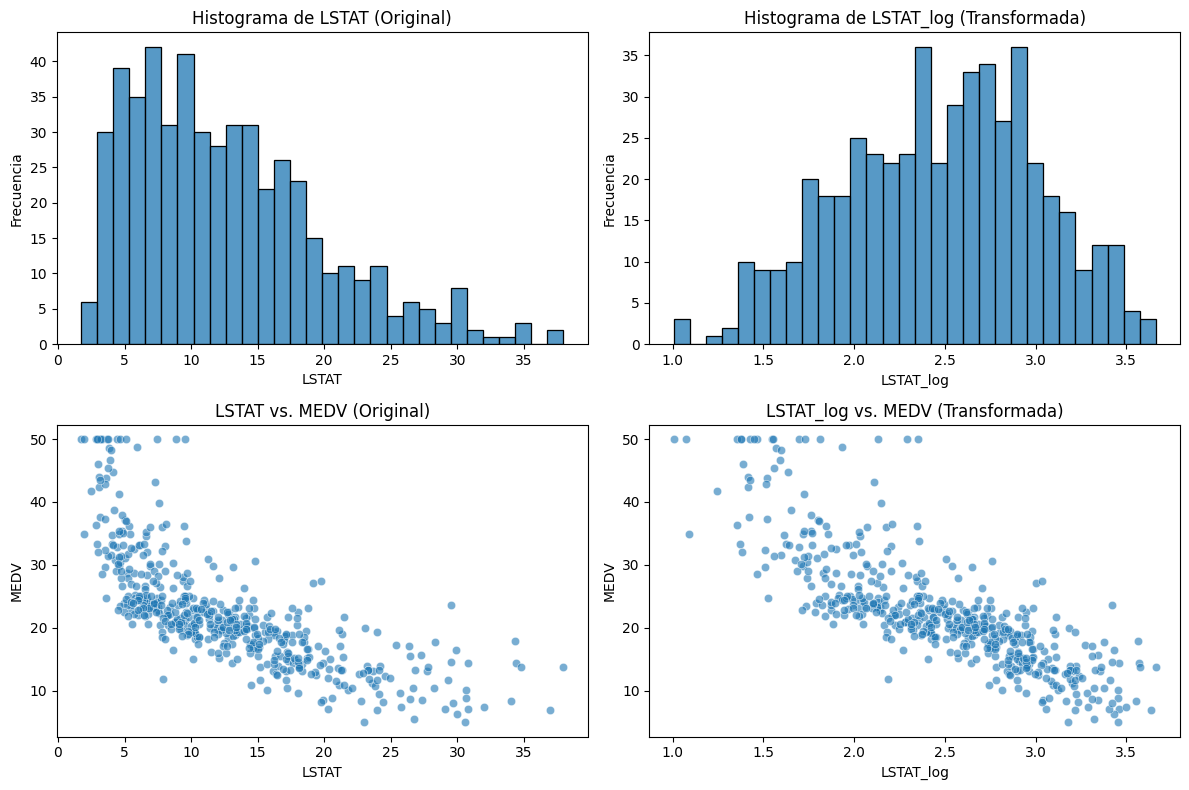

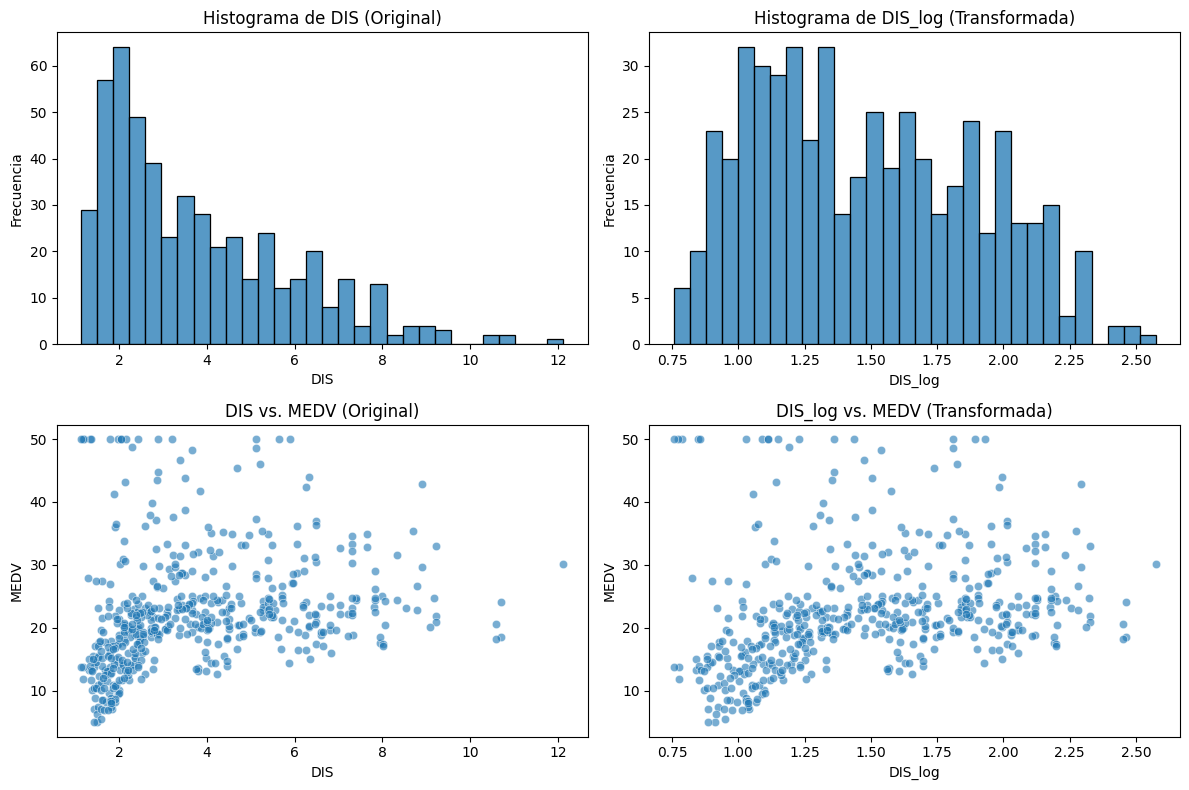

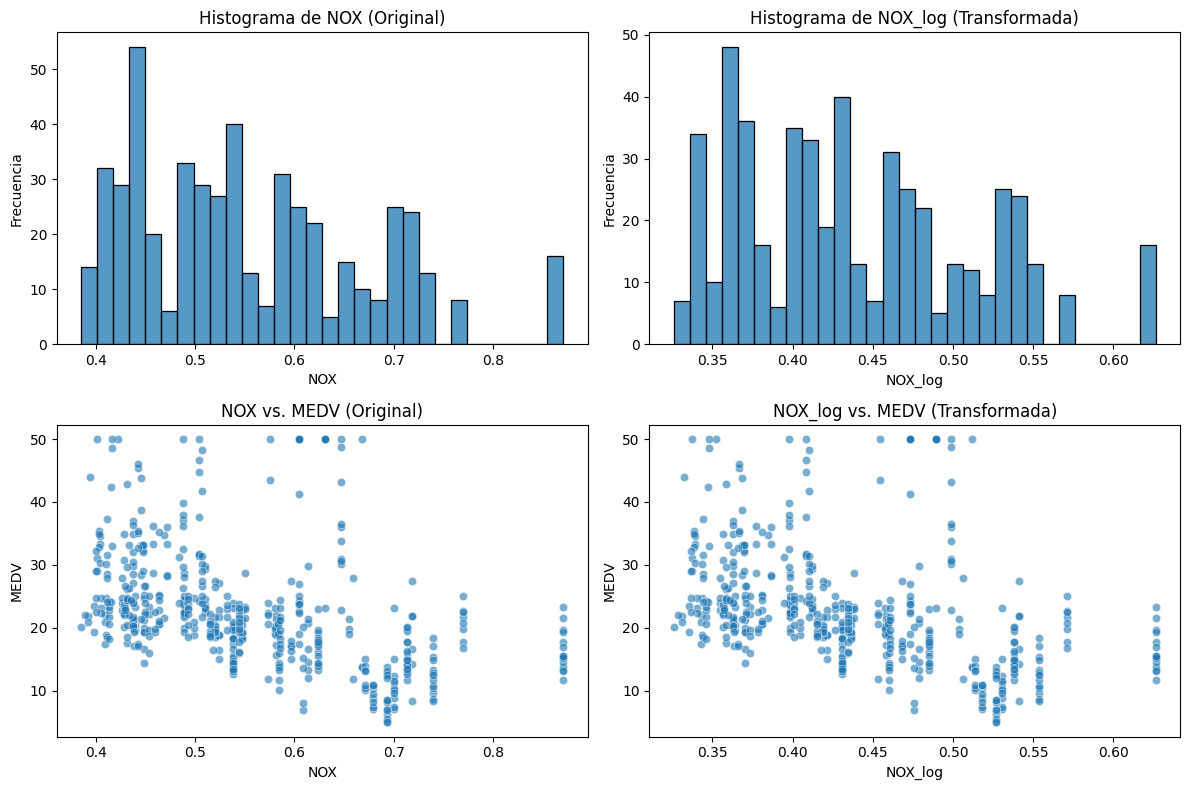

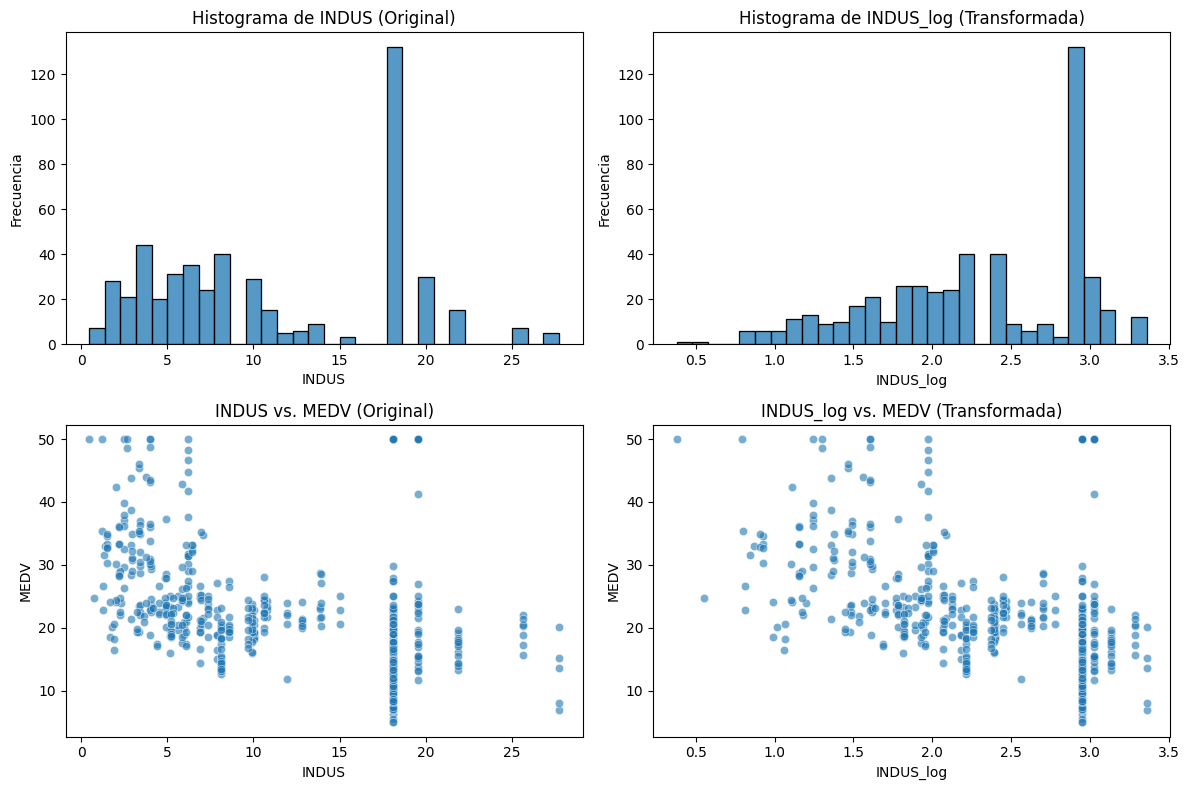

In [57]:
pairs = [
    ('LSTAT', 'LSTAT_log'),
    ('DIS',   'DIS_log'),
    ('NOX',   'NOX_log'),
    ('INDUS', 'INDUS_log'),
]

plot_comparison_original_transformed(
    df=housing_df, 
    target='MEDV', 
    pairs=pairs,
    bins=30
)


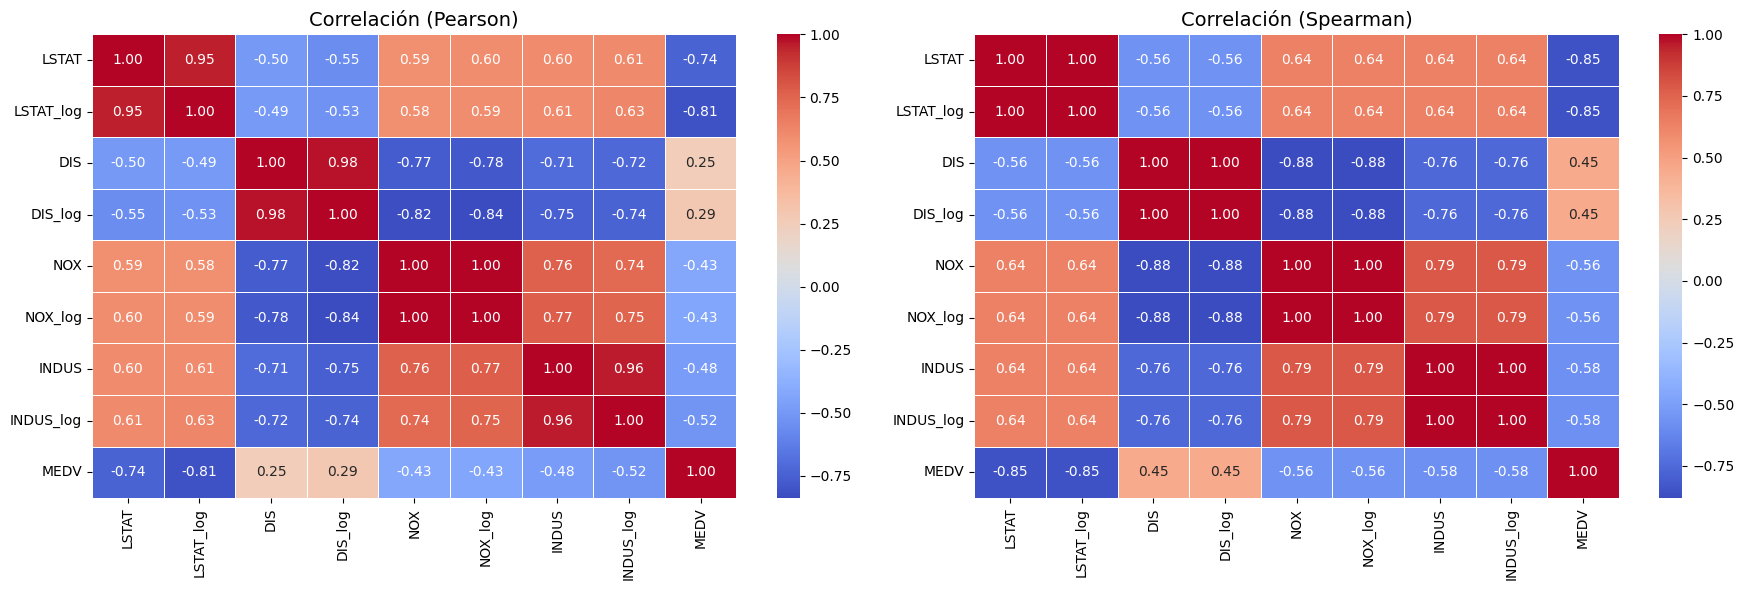

In [58]:
def plot_correlation_heatmaps_side_by_side(df, columns, methods=('spearman', 'pearson')):
    """
    Dibuja, en una sola figura con dos subplots (lado a lado),
    los heatmaps de correlación para el conjunto de columnas 'columns'
    usando los dos métodos especificados en 'methods'.
    """
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 fila, 2 columnas

    for i, m in enumerate(methods):
        corr_matrix = df[columns].corr(method=m)
        sns.heatmap(
            corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5,
            cbar=True,
            ax=axes[i]
        )
        axes[i].set_title(f'Correlación ({m.capitalize()})', fontsize=14)

    plt.tight_layout()
    plt.show()


# Seleccionamos columnas de interés para ver la comparación
cols_of_interest = [
    'LSTAT', 'LSTAT_log',
    'DIS',   'DIS_log',
    'NOX',   'NOX_log',
    'INDUS', 'INDUS_log',
    'MEDV'
]

plot_correlation_heatmaps_side_by_side(
    df=housing_df,
    columns=cols_of_interest,
    methods=('pearson', 'spearman')
)


## Nuevo modelo con LSTAT_log y sin LSTAT

In [64]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Definir las features y el target,
#    EXCLUYENDO 'LSTAT' y manteniendo 'LSTAT_log'
X_new = housing_df.drop(['MEDV', 'LSTAT', 'DIS', 'INDUS', 'NOX'], axis=1)
y_new = housing_df['MEDV']

# 2. Dividir en conjunto de entrenamiento y prueba
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, 
    y_new, 
    test_size=0.2, 
    random_state=42
)

# 3. Escalado (StandardScaler) a los datos de entrenamiento y test
scaler = StandardScaler()
X_train_scaled_new = scaler.fit_transform(X_train_new)
X_test_scaled_new = scaler.transform(X_test_new)

# 4. Convertir a DataFrame escalado, conservando columnas e índices
X_train_scaled_new = pd.DataFrame(X_train_scaled_new, 
                                  columns=X_train_new.columns, 
                                  index=X_train_new.index)
X_test_scaled_new = pd.DataFrame(X_test_scaled_new, 
                                 columns=X_test_new.columns, 
                                 index=X_test_new.index)

# 5. Agregar la constante para el intercepto
X_train_sm_new = sm.add_constant(X_train_scaled_new)
X_test_sm_new = sm.add_constant(X_test_scaled_new)

# 6. Crear y entrenar el modelo OLS con 'LSTAT_log' (y SIN 'LSTAT')
ols_model_new = sm.OLS(y_train_new, X_train_sm_new).fit()

# 7. Mostrar el resumen estadístico del modelo
print(ols_model_new.summary())

# 8. Predecir valores en el conjunto de prueba
y_pred_new = ols_model_new.predict(X_test_sm_new)

# 9. Evaluar el modelo (usando tu función 'print_regression_report')
print_regression_report(y_test_new, y_pred_new)


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     124.4
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          8.43e-130
Time:                        19:39:51   Log-Likelihood:                -1144.2
No. Observations:                 404   AIC:                             2316.
Df Residuals:                     390   BIC:                             2372.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.7965      0.208    109.570      0.0

## SGDRegressor

In [72]:
from sklearn.linear_model import SGDRegressor

# 1. Definir las features y el target (ya lo tienes hecho):
X_new = housing_df.drop(['MEDV', 'LSTAT', 'DIS', 'INDUS', 'NOX'], axis=1)
y_new = housing_df['MEDV']

# 2. Dividir en conjunto de entrenamiento y prueba
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42
)

# 3. Escalado (StandardScaler)
scaler = StandardScaler()
X_train_scaled_new = scaler.fit_transform(X_train_new)
X_test_scaled_new = scaler.transform(X_test_new)

# 4. Entrenamos un SGDRegressor
sgd_reg = SGDRegressor(
    penalty='l2',        # regularización tipo Ridge
    alpha=0.001,         # fuerza de regularización
    max_iter=1000,       # iteraciones máximas
    tol=1e-5,            # tolerancia de parada
    random_state=42
)

sgd_reg.fit(X_train_scaled_new, y_train_new)

# 5. Realizar predicciones en el conjunto de test
y_pred_sgd = sgd_reg.predict(X_test_scaled_new)

# 6. Evaluar el modelo con tu función o manualmente
print_regression_report(y_test_new, y_pred_sgd)


Mean Squared Error : 18.607640589542612
mean Absolute Error : 2.857399794335492
R2 Score : 0.7462610029423624
